In [1]:
from IPython.core.display_functions import display

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shared_logic import set_size

random_seed = 1
np.random.seed(random_seed)

In [3]:
# Width of the LaTeX document
plt.style.use('seaborn-colorblind')
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 11,
    "font.size": 11
}
plt.rcParams.update(tex_fonts)



In [4]:
stations_df = pd.read_csv('./data/stations.csv')
stations_dict = stations_df.groupby(['common_id']).first().to_dict('index')

In [5]:
common_id = '36022-ie'
tex_plots_path = f'../bachelor-thesis/plots/pdfs/{common_id}/'

df = pd.read_parquet(f'./data/classified_raw/{common_id}_outliers_classified.parquet')
# df['water_level'] = df['value']
# del df['value']
# df['timestamp'] = df['sourceDate']
# del df['sourceDate']
# df.sort_values(by='timestamp', inplace=True)
# df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27189 entries, 0 to 27188
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   water_level  27189 non-null  float64            
 1   timestamp    27189 non-null  datetime64[ns, UTC]
 2   is_outlier   27189 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), float64(1)
memory usage: 451.5 KB


In [7]:
# display(df.head())
display(df.describe())

,water_level
count,27189.000000
mean,36.009754
std,14.716286
min,0.000000
25%,26.400000
50%,31.700000
75%,40.300000
max,190.000000


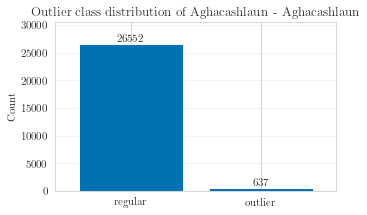

In [8]:
fig, ax = plt.subplots(1, 1, figsize=set_size('thesis'))
bars = plt.bar(['regular', 'outlier'], df['is_outlier'].value_counts().to_numpy())
plt.margins(0.1,0.15)
ax.bar_label(bars)
# plt.xlabel('Is an outlier?')
plt.ylabel('Count')
plt.title(f'Outlier class distribution of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25, axis='y')
plt.savefig(f'{tex_plots_path}outlier_class_distribution_{common_id}.pdf', format='pdf', bbox_inches='tight')

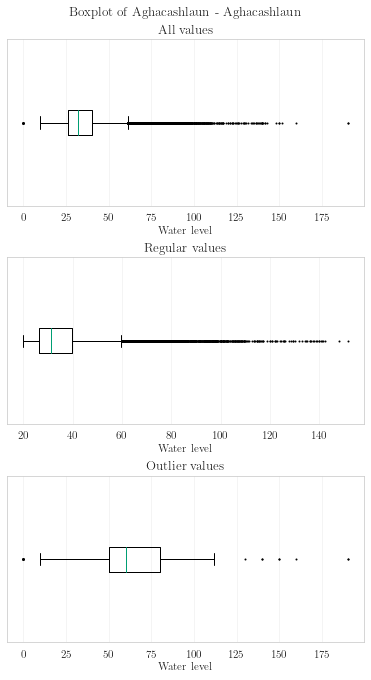

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True, figsize=set_size('thesis', subplots=(3, 1)))
# fig.subplots_adjust(hspace=0.25)

ax1.set_title('All values')
ax1.boxplot(df['water_level'].to_numpy(), vert=False, flierprops={'marker': '.', 'markersize': 2})
ax1.set_xlabel('Water level')
# Hide y axis
ax1.get_yaxis().set_visible(False)
ax1.grid(alpha=0.25)

ax2.set_title('Regular values')
ax2.boxplot(df.loc[~df['is_outlier'], 'water_level'].to_numpy(), vert=False, flierprops={'marker': '.', 'markersize': 2})
ax2.set_xlabel('Water level')
# Hide y axis
ax2.get_yaxis().set_visible(False)
ax2.grid(alpha=0.25)

ax3.set_title('Outlier values')
ax3.boxplot(df.loc[df['is_outlier'], 'water_level'].to_numpy(), vert=False, flierprops={'marker': '.', 'markersize': 2})
ax3.set_xlabel('Water level')
# Hide y axis
ax3.get_yaxis().set_visible(False)
ax3.grid(alpha=0.25)

plt.suptitle(f'Boxplot of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')


plt.savefig(f'{tex_plots_path}boxplot_{common_id}.pdf', format='pdf', bbox_inches='tight')

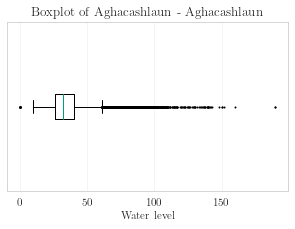

In [10]:
fig, ax = plt.subplots(1, 1, figsize=set_size('thesis'))
plt.boxplot(df['water_level'].to_numpy(), vert=False, flierprops={'marker': '.', 'markersize': 2})
plt.xlabel('Water level')
# Hide y axis
ax.get_yaxis().set_visible(False)
plt.title(f'Boxplot of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)
plt.savefig(f'{tex_plots_path}boxplot_{common_id}.pdf', format='pdf', bbox_inches='tight')

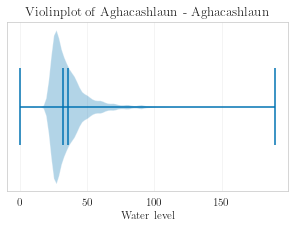

In [11]:
fig, ax = plt.subplots(1, 1, figsize=set_size('thesis'))
plt.violinplot(df['water_level'].to_numpy(), vert=False,showmeans=True, showmedians=True, showextrema=True)
plt.xlabel('Water level')
# Hide y axis
ax.get_yaxis().set_visible(False)
plt.title(f'Violinplot of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)


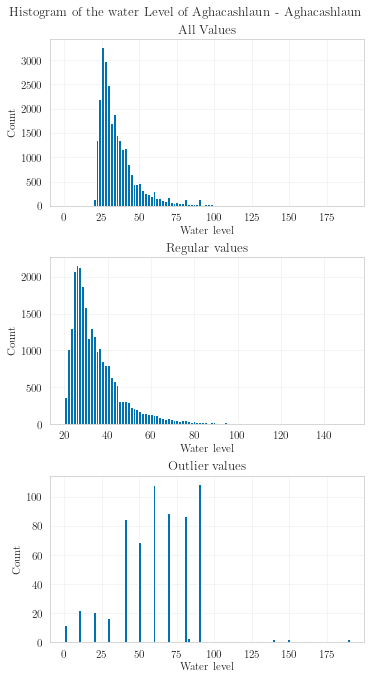

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True, figsize=set_size('thesis', subplots=(3,1)))
ax1.set_title('All Values')
ax1.hist(df['water_level'].to_numpy(), bins=100)
ax1.set_xlabel('Water level')
ax1.set_ylabel('Count')
ax1.grid(alpha=0.25)

ax2.set_title('Regular values')
ax2.hist(df.loc[~df['is_outlier'], 'water_level'].to_numpy(), bins=100)
ax2.set_xlabel('Water level')
ax2.set_ylabel('Count')
ax2.grid(alpha=0.25)

ax3.set_title('Outlier values')
ax3.hist(df.loc[df['is_outlier'], 'water_level'].to_numpy(), bins=100)
ax3.set_xlabel('Water level')
ax3.set_ylabel('Count')
ax3.grid(alpha=0.25)

plt.suptitle(f'Histogram of the water Level of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.savefig(f'{tex_plots_path}water_level_histogram_{common_id}.pdf', format='pdf', bbox_inches='tight')

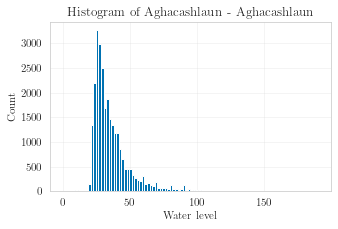

In [13]:
fig, ax = plt.subplots(1, 1, figsize=set_size('thesis'))
plt.hist(df['water_level'].to_numpy(), bins=100)
plt.xlabel('Water level')
plt.ylabel('Count')
plt.title(f'Histogram of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)
# plt.show()
plt.savefig(f'{tex_plots_path}histogram_{common_id}.pdf', format='pdf', bbox_inches='tight')

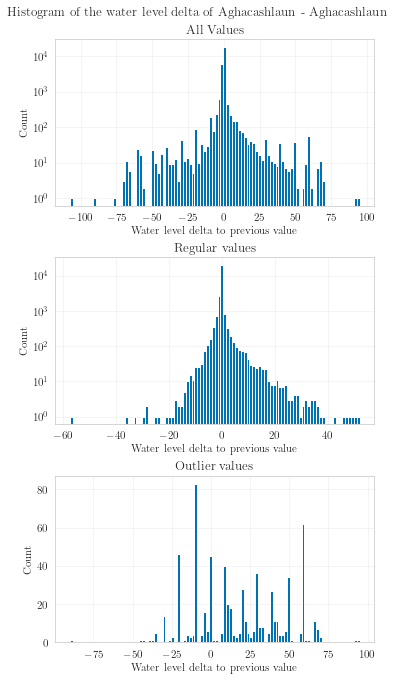

In [14]:
df['water_level_diff'] = df['water_level'].diff()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True, figsize=set_size('thesis', subplots=(3,1)))
ax1.set_title('All Values')
ax1.hist(df['water_level_diff'].to_numpy(), bins=100)
ax1.set_yscale('log')
ax1.set_xlabel('Water level delta to previous value')
ax1.set_ylabel('Count')
ax1.grid(alpha=0.25)

ax2.set_title('Regular values')
ax2.hist(df.loc[~df['is_outlier'], 'water_level'].diff().to_numpy(), bins=100)
ax2.set_yscale('log')
ax2.set_xlabel('Water level delta to previous value')
ax2.set_ylabel('Count')
ax2.grid(alpha=0.25)

ax3.set_title('Outlier values')
ax3.hist(df.loc[df['is_outlier'], 'water_level_diff'].to_numpy(), bins=100)
ax3.set_xlabel('Water level delta to previous value')
ax3.set_ylabel('Count')
ax3.grid(alpha=0.25)

plt.suptitle(f'Histogram of the water level delta of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.savefig(f'{tex_plots_path}water_level_delta_histogram_{common_id}.pdf', format='pdf', bbox_inches='tight')

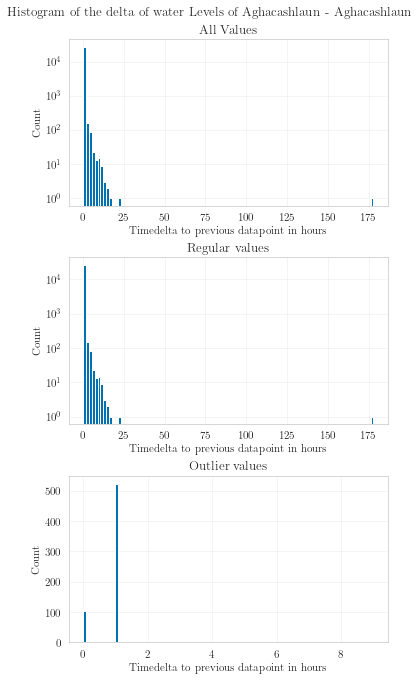

In [15]:
# get time difference between measurements in hours
df['timedelta'] = df['timestamp'].diff().astype('timedelta64[h]').astype(float)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True, figsize=set_size('thesis', subplots=(3,1)))
ax1.set_title('All Values')
ax1.hist(df['timedelta'].to_numpy(), bins=100)
ax1.set_yscale('log')
ax1.set_xlabel('Timedelta to previous datapoint in hours')
ax1.set_ylabel('Count')
ax1.grid(alpha=0.25)

ax2.set_title('Regular values')
ax2.hist(df.loc[~df['is_outlier'], 'timedelta'].to_numpy(), bins=100)
ax2.set_yscale('log')
ax2.set_xlabel('Timedelta to previous datapoint in hours')
ax2.set_ylabel('Count')
ax2.grid(alpha=0.25)

ax3.set_title('Outlier values')
ax3.hist(df.loc[df['is_outlier'], 'timedelta'].to_numpy(), bins=100)
ax3.set_xlabel('Timedelta to previous datapoint in hours')
ax3.set_ylabel('Count')
ax3.grid(alpha=0.25)

plt.suptitle(f'Histogram of the delta of water Levels of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.savefig(f'{tex_plots_path}water_level_delta_histogram_{common_id}.pdf', format='pdf', bbox_inches='tight')

/tmp/ipykernel_30063/1793376755.py:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(df['water_level'].to_numpy())


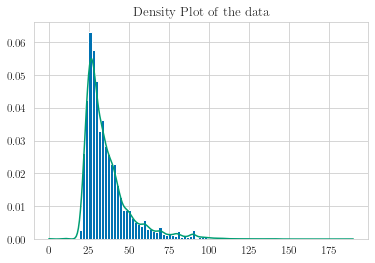

In [16]:
from scipy.stats import kde
density = kde.gaussian_kde(df['water_level'].to_numpy())
x = np.linspace(np.floor(df['water_level'].min()), np.ceil(df['water_level'].max()), 300)
y = density(x)
plt.hist(df['water_level'], bins=100, density=True)
plt.plot(x, y)
plt.title("Density Plot of the data")
plt.show()

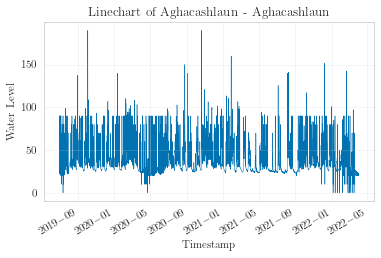

In [20]:
fig, ax = plt.subplots(1, 1, figsize=set_size('thesis'))
plt.plot(df['timestamp'], df['water_level'], linewidth=0.5, zorder=-1)
# plt.scatter(df['timestamp'], df['water_level'], s=0.5)
plt.gcf().autofmt_xdate()
plt.xlabel('Timestamp')
plt.ylabel('Water Level')
plt.title(f'Linechart of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
plt.grid(alpha=0.25)
# plt.show()
plt.savefig(f'{tex_plots_path}linechart_{common_id}.pdf', format='pdf', bbox_inches='tight')


In [21]:
n_line_plots = 10
min_date = df['timestamp'].min()
max_date = df['timestamp'].max()
date_range = pd.date_range(min_date, max_date, periods=n_line_plots+1).to_list()


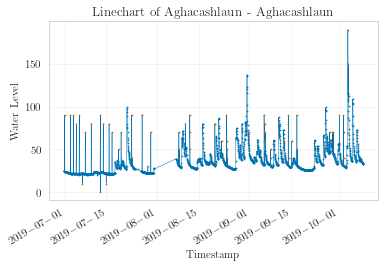

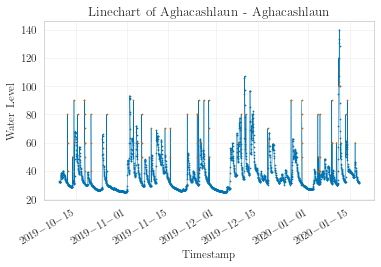

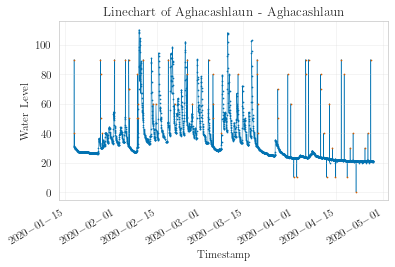

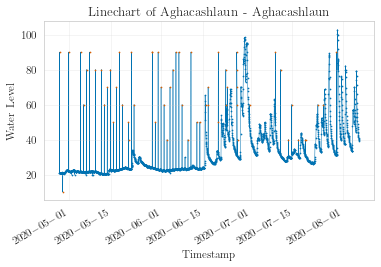

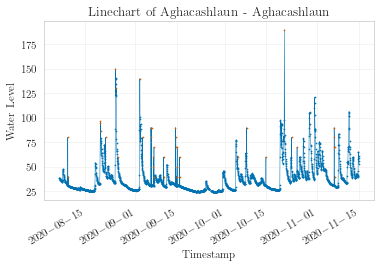

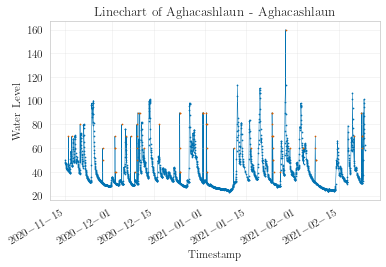

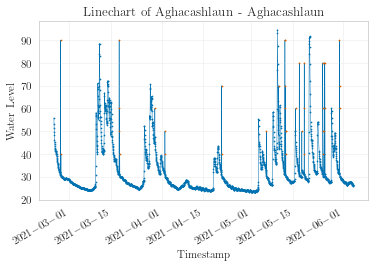

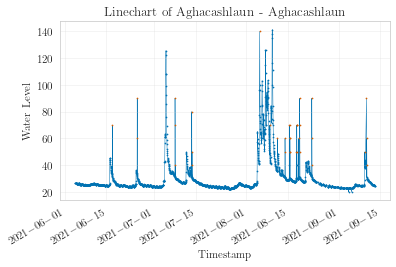

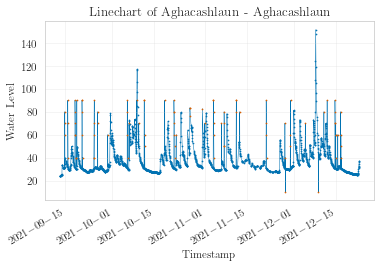

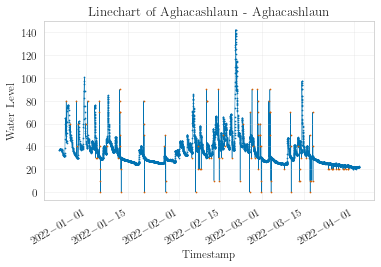

In [22]:
for i in range(n_line_plots):
    fig, ax = plt.subplots(1, 1, figsize=set_size('thesis'))
    df_slice = df[(df['timestamp'] >= date_range[i]) & (df['timestamp'] < date_range[i + 1])]
    plt.plot(df_slice['timestamp'], df_slice['water_level'], linewidth=0.5, zorder=-1)
    plt.scatter(df_slice.loc[~df_slice['is_outlier'],'timestamp'], df_slice.loc[~df_slice['is_outlier'],'water_level'], s=0.5)
    plt.scatter(df_slice.loc[df_slice['is_outlier'],'timestamp'], df_slice.loc[df_slice['is_outlier'],'water_level'], s=0.5, c='C2')
    plt.gcf().autofmt_xdate()
    plt.xlabel('Timestamp')
    plt.ylabel('Water Level')
    plt.title(f'Linechart of {stations_dict[common_id]["water_name"]} - {stations_dict[common_id]["station_name"]}')
    plt.grid(alpha=0.25)
    plt.savefig(f'{tex_plots_path}linechart{i}_{common_id}.pdf', format='pdf', bbox_inches='tight')